<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Convolutional%20Neural%20Network/CNN_For_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


In [8]:
#Convolution expects height x width x color
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)

In [19]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
k = len(set(y_train))
print("number of classes: ", k)

number of classes:  10


In [17]:
print(x_train[0].shape)

(28, 28, 1)


In [23]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64,(3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128,(3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i,x)


In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5255 - accuracy: 0.8067 - val_loss: 0.3964 - val_accuracy: 0.8507
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3659 - accuracy: 0.8620 - val_loss: 0.3410 - val_accuracy: 0.8740
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3186 - accuracy: 0.8802 - val_loss: 0.3213 - val_accuracy: 0.8815
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2853 - accuracy: 0.8935 - val_loss: 0.3014 - val_accuracy: 0.8890
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2603 - accuracy: 0.9010 - val_loss: 0.2962 - val_accuracy: 0.8953
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2380 - accuracy: 0.9104 - val_loss: 0.2995 - val_accuracy: 0.8943
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2198 - accuracy: 0.9153 - val_loss: 0.3085 -

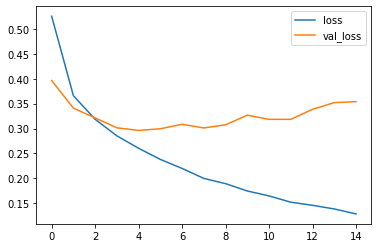

In [25]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

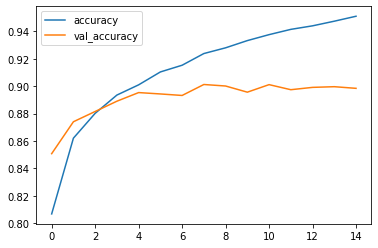

In [26]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Confusion matrix, wihtout normalization
[[870   2  25  12   2   1  78   0  10   0]
 [  6 979   0  10   2   0   1   0   2   0]
 [ 17   1 881   8  45   0  47   0   1   0]
 [ 29   9  22 897  24   0  17   0   1   1]
 [  1   1  78  33 828   0  57   0   2   0]
 [  0   1   0   2   0 963   0  23   1  10]
 [130   4  79  25  92   0 660   0  10   0]
 [  0   0   0   0   0   3   0 963   0  34]
 [  2   0   7   4   4   1   3   4 974   1]
 [  1   0   0   0   0   4   0  26   0 969]]


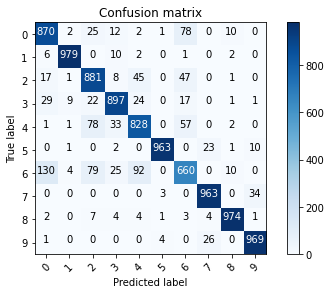

In [28]:
def plot_confusion_matirx(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, wihtout normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matirx(cm, list(range(10)))


In [32]:
labels = '''T-shrit/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()


Text(0.5, 1.0, 'True label: Shirt predicted: Coat')

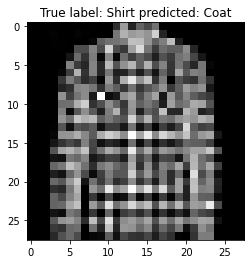

In [33]:
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s predicted: %s' %(labels[y_test[i]], labels[p_test[i]]))